<a href="https://colab.research.google.com/github/hhauschild/keras-playground/blob/master/liveproject_dl_predict_4_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load data


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

gameurl = r'https://liveproject-resources.s3.amazonaws.com/other/deeplearningbasketballscores/Games-Calculated.csv'
dateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv(gameurl, header = None, \
                      names=["date","home_team","home_score", "away_team","away_score", \
                             "home_sc_avg", \
                             "home_defensive_avg", "away_sc_avg", "away_defensive_avg", "result" ] ,\
                      parse_dates=["date"], \
                      dtype={"home_team":str,"home_score":int,"away_team":str,\
                             "away_score":int, "home_sc_avg":float, \
                             "home_defensive_avg":float, "away_sc_avg":float,  \
                             "away_defensive_avg":float, "result":int} \
                      );
df.head()

,date,home_team,home_score,away_team,away_score,home_sc_avg,home_defensive_avg,away_sc_avg,away_defensive_avg,result
0,2015-11-13,Hawaii,87,Montana State,76,87.0,76.0,76.0,87.0,11
1,2015-11-13,Eastern Michigan,70,Vermont,50,70.0,50.0,50.0,70.0,20
2,2015-11-13,Yale,70,Fairfield,57,70.0,57.0,57.0,70.0,13
3,2015-11-13,Central Michigan,89,Jacksonville State,83,89.0,83.0,83.0,89.0,6
4,2015-11-13,Iowa State,68,Colorado,62,68.0,62.0,62.0,68.0,6


2. Prepare data


In [ ]:
# remove irrelevant columns (the (uncalculated) original raw data)
df.drop(["date","home_team","home_score", "away_team","away_score"], axis=1, inplace=True, errors='ignore')

# split 80:20
df_x_train= df.sample(frac=.8, random_state=0)
df_x_valid= df.drop(df_x_train.index)

print(df_x_train.shape[0])

# cut off y
df_y_train = df_x_train.pop('result')
df_y_valid = df_x_valid.pop('result')

# normalize
train_x_mean = df_x_train.mean(axis = 0)
df_x_train_normalized = df_x_train - train_x_mean
train_x_stdd = df_x_train_normalized.std(axis=0)
df_x_train_normalized /= train_x_stdd

df_x_valid_normalized = (df_x_valid - train_x_mean) / train_x_stdd

df_x_train_normalized.head()

16128


,home_sc_avg,home_defensive_avg,away_sc_avg,away_defensive_avg
5951,0.466862,-0.564797,-0.104406,0.664043
15481,-1.813378,-0.040936,0.689466,0.730448
16660,1.891701,0.354039,0.341276,-0.557815
4896,-0.538980,-0.325040,-0.997915,1.072691
12061,0.540443,-0.318741,-0.271538,-0.079697


3. Create neural network


In [ ]:
from keras.models import Sequential 
from keras.layers import Activation, Dense
from keras import losses 
from keras import optimizers 
from keras import metrics 
model = Sequential([Dense(32, activation= "relu", input_shape=[4]),Dense(32, activation= "relu"),Dense(1)])

print(model.summary())

model.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.RMSprop(), metrics = [metrics.MeanSquaredError(),metrics.Accuracy(),metrics.MeanAbsoluteError()])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None


Using TensorFlow backend.


4. Train model


In [ ]:
# train the model

gg = model.fit(
    x=df_x_train_normalized,
    y=df_y_train,
    batch_size=64,
    epochs=5000,
    verbose=1,
    validation_data=(df_x_valid_normalized, df_y_valid),
)
gg

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
16128/16128 [==============================] - 0s 19us/step - loss: 98.3155 - mean_squared_error: 98.3155 - accuracy: 0.0000e+00 - mean_absolute_error: 7.7002 - val_loss: 105.7855 - val_mean_squared_error: 105.7855 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 7.9512
Epoch 2502/5000
16128/16128 [==============================] - 0s 18us/step - loss: 98.4517 - mean_squared_error: 98.4518 - accuracy: 0.0000e+00 - mean_absolute_error: 7.7083 - val_loss: 105.2297 - val_mean_squared_error: 105.2297 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 7.9339
Epoch 2503/5000
16128/16128 [==============================] - 0s 19us/step - loss: 98.3990 - mean_squared_error: 98.3990 - accuracy: 0.0000e+00 - mean_absolute_error: 7.7182 - val_loss: 105.5002 - val_mean_squared_error: 105.5002 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 7.9469
Epoch 2504/5000
16128/16128 [==============================] - 0s 19us/st

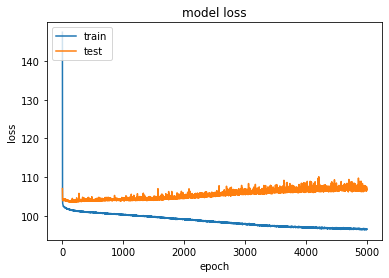

In [5]:
plt.plot(gg.history["loss"])
plt.plot(gg.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()